In [ ]:
#importing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
tf.keras.backend.clear_session()
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import datasets, tree, linear_model, svm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
'''This is a dataset of EEG brainwave data that has been processed with original strategy of statistical extraction
    the data set consist brain signal of one male and one feamle by showing them different scenes (like Emotional,Funny,Death,Nature scenes)
    and took their brain signal in these particular environments'''

#Reading dataset
data = pd.read_csv("emotions.csv")

In [ ]:
#chceking length of dataset
len(data)

2132

In [ ]:
#Seprarting Positive,Neagtive and Neutral dataframes for plortting
pos = data.loc[data["label"]=="POSITIVE"]
sample_pos = pos.loc[2, 'fft_0_b':'fft_749_b']
neg = data.loc[data["label"]=="NEGATIVE"]
sample_neg = neg.loc[0, 'fft_0_b':'fft_749_b']
neu = data.loc[data["label"]=="NEUTRAL"]
sample_neu = neu.loc[1, 'fft_0_b':'fft_749_b']

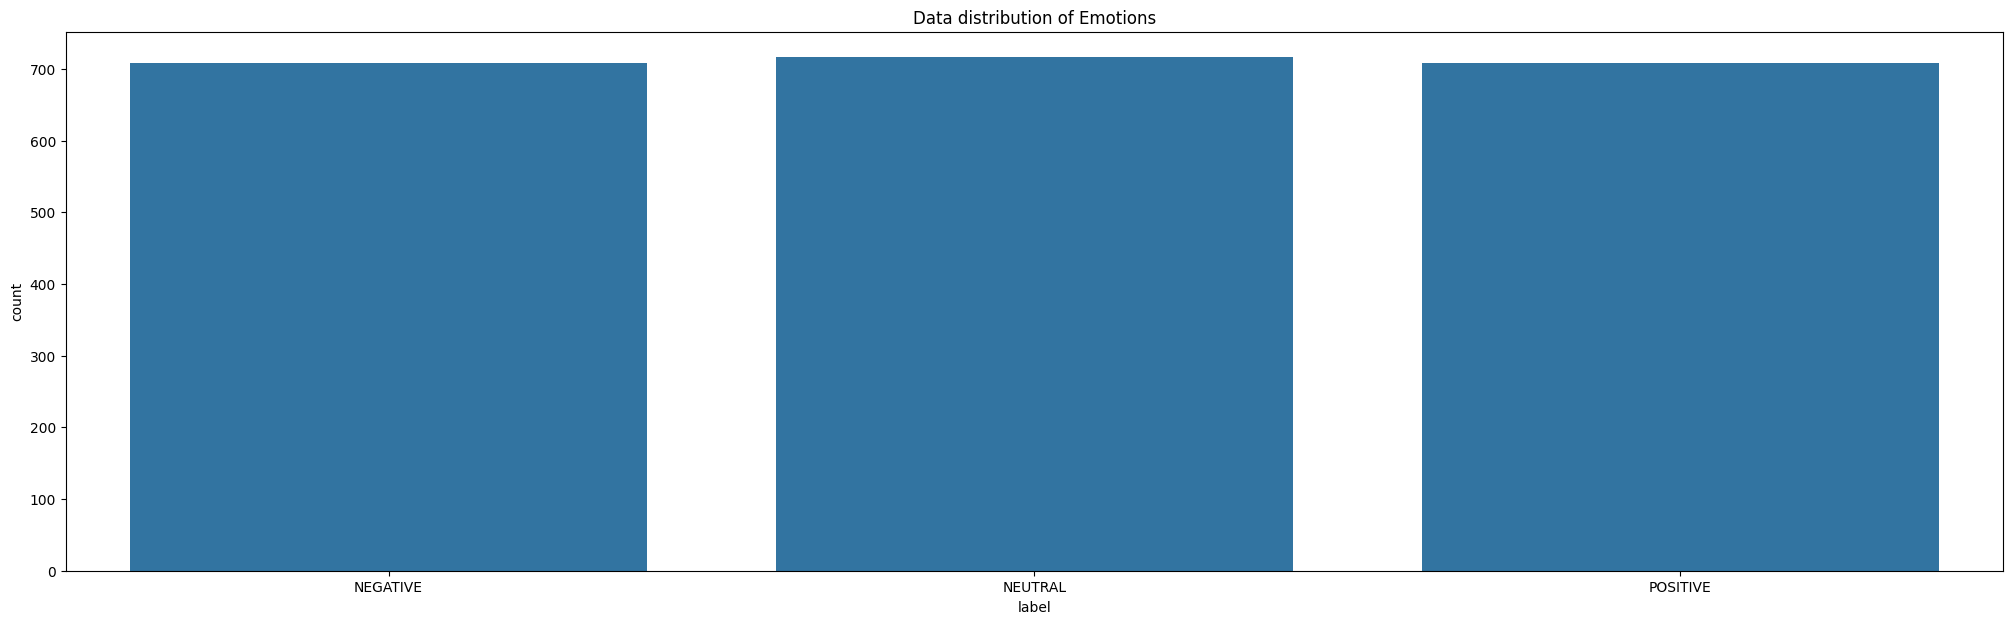

In [ ]:
#plottintg Dataframe distribution
plt.figure(figsize=(25,7))
plt.title("Data distribution of Emotions")
plt.style.use('fivethirtyeight')
sns.countplot(x='label', data=data)
plt.show()

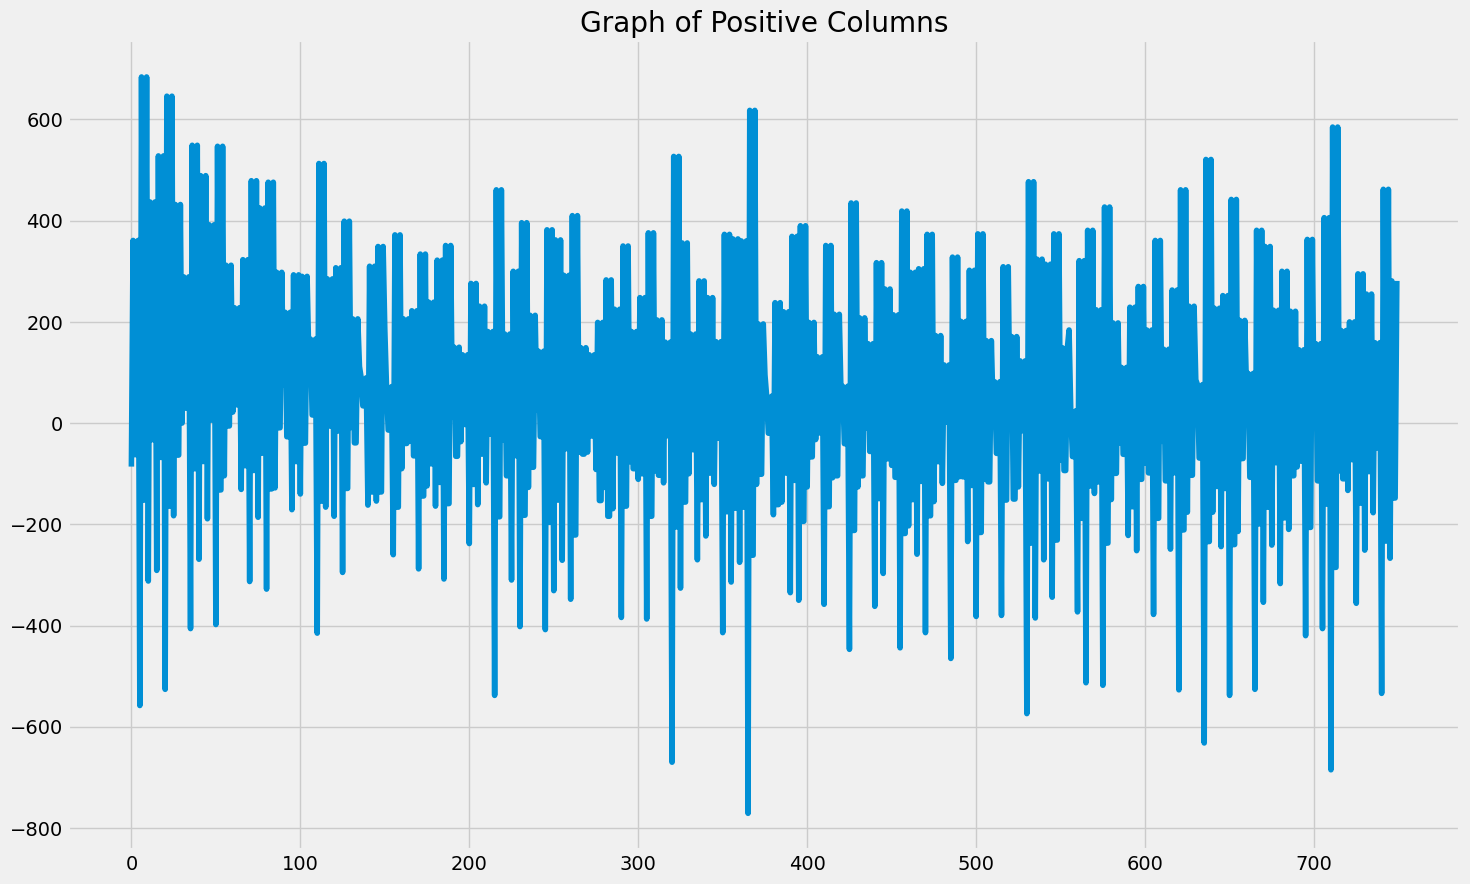

'As we can noticed the most of the Negative Signals are from greater than 600 to and less than than -600'

In [ ]:
#Plotting Positive DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_pos)), sample_pos)
plt.title("Graph of Positive Columns")
plt.show()
'''As we can noticed the most of the Negative Signals are from greater than 600 to and less than than -600'''

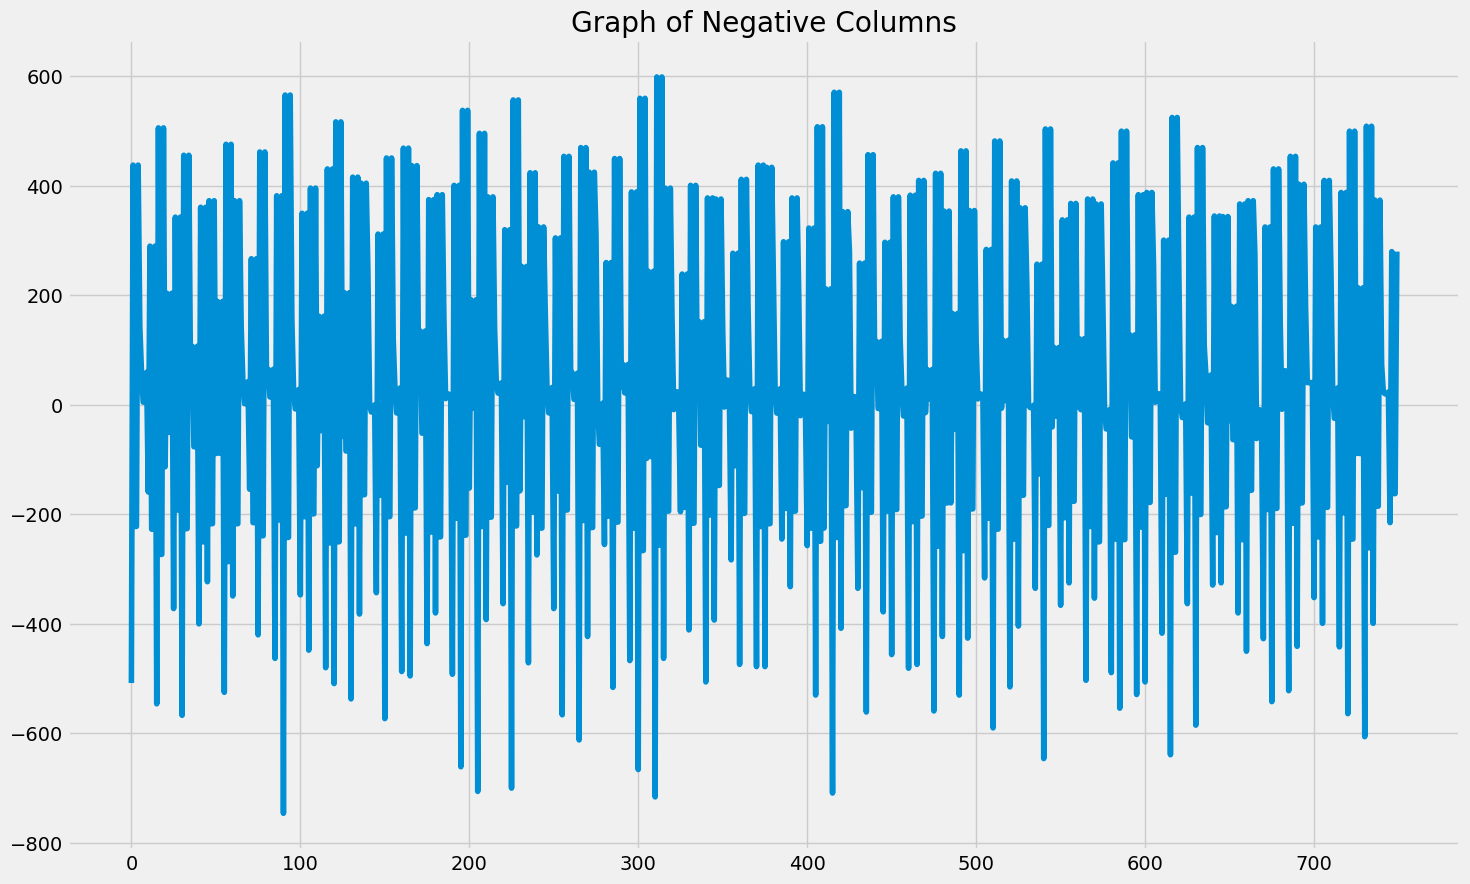

'As we can noticed the most of the Negative Signals are from less than 600 to and greater than -600'

In [ ]:
#Plotting Negative DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_neg)), sample_neg)
plt.title("Graph of Negative Columns")
plt.show()
'''As we can noticed the most of the Negative Signals are from less than 600 to and greater than -600'''

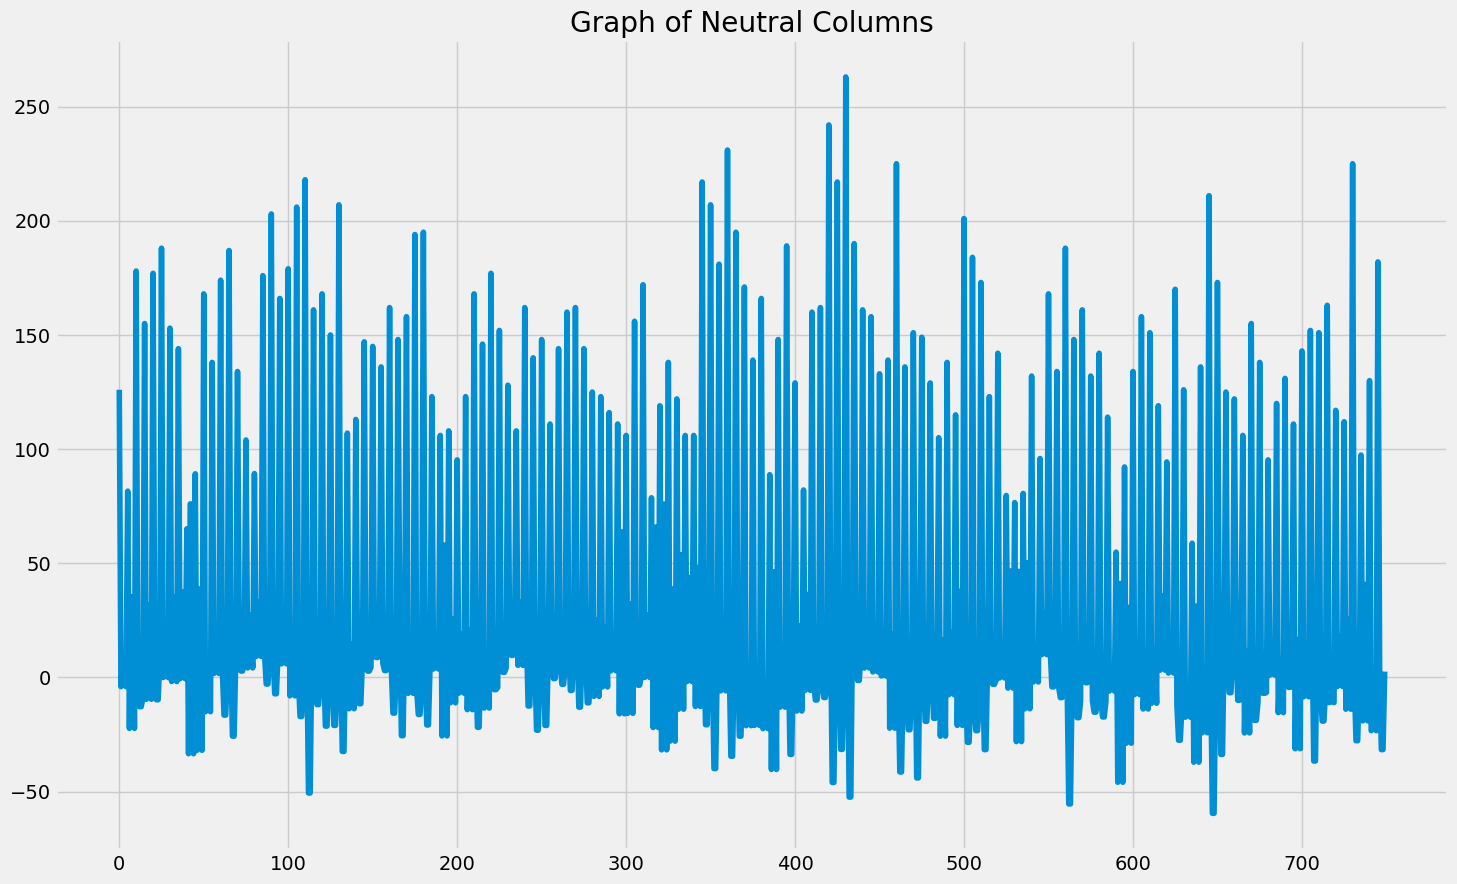

'As we can see the most of the Neutral Signals ae in between -50 to 250 '

In [ ]:
#Plotting Neutral DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_neu)), sample_neu)
plt.title("Graph of Neutral Columns")
plt.show()
'''As we can see the most of the Neutral Signals ae in between -50 to 250 '''

In [ ]:
def Transform_data(data):
    #Encoding Lables into numbers
    encoding_data = ({'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 2} )
    data_encoded = data.replace(encoding_data)
    #getting brain signals into x variable
    x=data_encoded.drop(["label"]  ,axis=1)
    #getting labels into y variable
    y = data_encoded.loc[:,'label'].values
    scaler = StandardScaler()
    #scaling Brain Signals
    scaler.fit(x)
    X = scaler.transform(x)
    #One hot encoding Labels
    Y = to_categorical(y)
    return X,Y

In [ ]:
#Calling above function and splitting dataset into train and test
X,Y = Transform_data(data)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

<ipython-input-26-7c119ee76ebd>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_encoded = data.replace(encoding_data)


In [ ]:
#checking shape of dataset
x_train.shape[1]

2548

In [ ]:
def create_model():
    #input layer of model for brain signals
    inputs = tf.keras.Input(shape=(x_train.shape[1],))
    #Hidden Layer for Brain signal using LSTM(GRU)
    # Use Keras layers instead of tf.expand_dims
    expand_dims = tf.keras.layers.Reshape((x_train.shape[1], 1))(inputs)

    gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)
    #Flatten Gru layer into vector form (one Dimensional array)
    flatten = tf.keras.layers.Flatten()(gru)
    #output latyer of Model
    outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)


    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    print(model.summary())
    return model

In [ ]:
#cretaing model
lstmmodel = create_model()
#Compiling model
lstmmodel.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 2548)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 2548, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 2548, 256)           │         198,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 652288)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │       1,956,867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,155,779 (8.22 MB)

 Trainable params: 2,155,779 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
#Training and Evaluting model
history = lstmmodel.fit(x_train, y_train, epochs = 10, validation_split=0.1)
loss, acc = lstmmodel.evaluate(x_test, y_test)

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 350s 7s/step - accuracy: 0.8241 - loss: 0.7674 - val_accuracy: 0.9123 - val_loss: 0.3569
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 357s 7s/step - accuracy: 0.9362 - loss: 0.1898 - val_accuracy: 0.9474 - val_loss: 0.1476
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 359s 7s/step - accuracy: 0.9491 - loss: 0.1142 - val_accuracy: 0.9240 - val_loss: 0.2102
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 371s 7s/step - accuracy: 0.9688 - loss: 0.1172 - val_accuracy: 0.9474 - val_loss: 0.1342
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 356s 7s/step - accuracy: 0.9639 - loss: 0.1096 - val_accuracy: 0.9825 - val_loss: 0.0704
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 380s 7s/step - accuracy: 0.9932 - loss: 0.0302 - val_accuracy: 0.9415 - val_loss: 0.2387
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 375s 7s/step - accuracy: 0.9811 - loss: 0.0522 - val_accuracy: 0.9006 - val_loss: 0.3330
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 387s 7s/step - accuracy: 0.9679 - loss: 0.1165 - val_accuracy: 0.9415 - v

In [ ]:
#Loss and Accuracy of model on Testiong Dataset
print(f"Loss on testing: {loss*100}",f"\nAccuracy on Training: {acc*100}")

Loss on testing: 14.941710233688354 
Accuracy on Training: 95.31615972518921


In [ ]:
#predicting model on test set for plotting Confusion Matrix
pred  = lstmmodel.predict(x_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step


In [ ]:
#Creation of Function of Confusion Matrix
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(data.label.unique()))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#after getting prediction checking maximum score prediction to claim which emotion this brain signal belongs to
pred1 = np.argmax(pred,axis=1)

In [ ]:
#inversing the one hot encoding
y_test1 =   np.argmax(y_test,axis=1)

In [ ]:
#printing first 10 Actual and predicted outputs of Test brain signals
print("Predicted:  ",pred1[:10])
print("\n")
print("Actual: ",y_test1[:10])


Predicted:   [1 1 1 2 1 1 2 1 2 1]


Actual:  [1 1 1 2 1 1 2 1 2 1]


Confusion matrix, without normalization
[[147   6   0]
 [  2 135   5]
 [  0   7 125]]


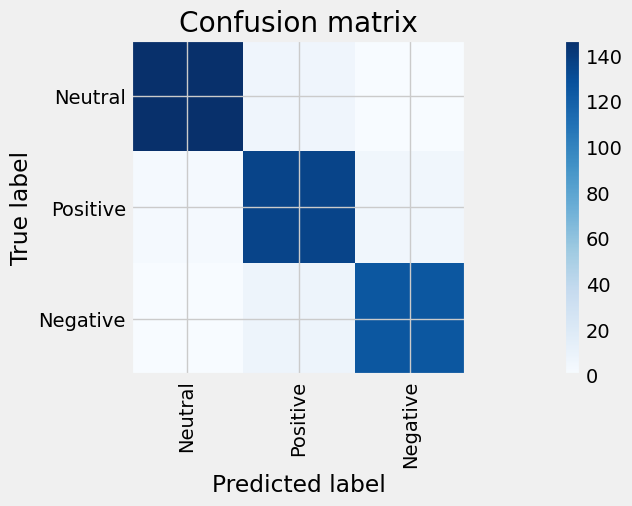

In [ ]:
#Plotting Confusion matrix of Lstm Model
cm = confusion_matrix(y_test1, pred1)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.rcParams["figure.figsize"]=(20,5)
plt.figure()
plot_confusion_matrix(cm,["Neutral","Positive","Negative"])

In [ ]:
names1 = ["Neutral","Positive","Negative"]


*		Classification Report GNB:
               precision    recall  f1-score   support

           0       0.65      0.97      0.78       153
           1       0.46      0.30      0.36       142
           2       0.81      0.66      0.73       132

    accuracy                           0.65       427
   macro avg       0.64      0.64      0.62       427
weighted avg       0.64      0.65      0.62       427


*		Classification Report SVM:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       153
           1       0.98      0.89      0.94       142
           2       0.94      0.99      0.97       132

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427


*		Classification Report LR:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       153
           1       0.99      0.93 

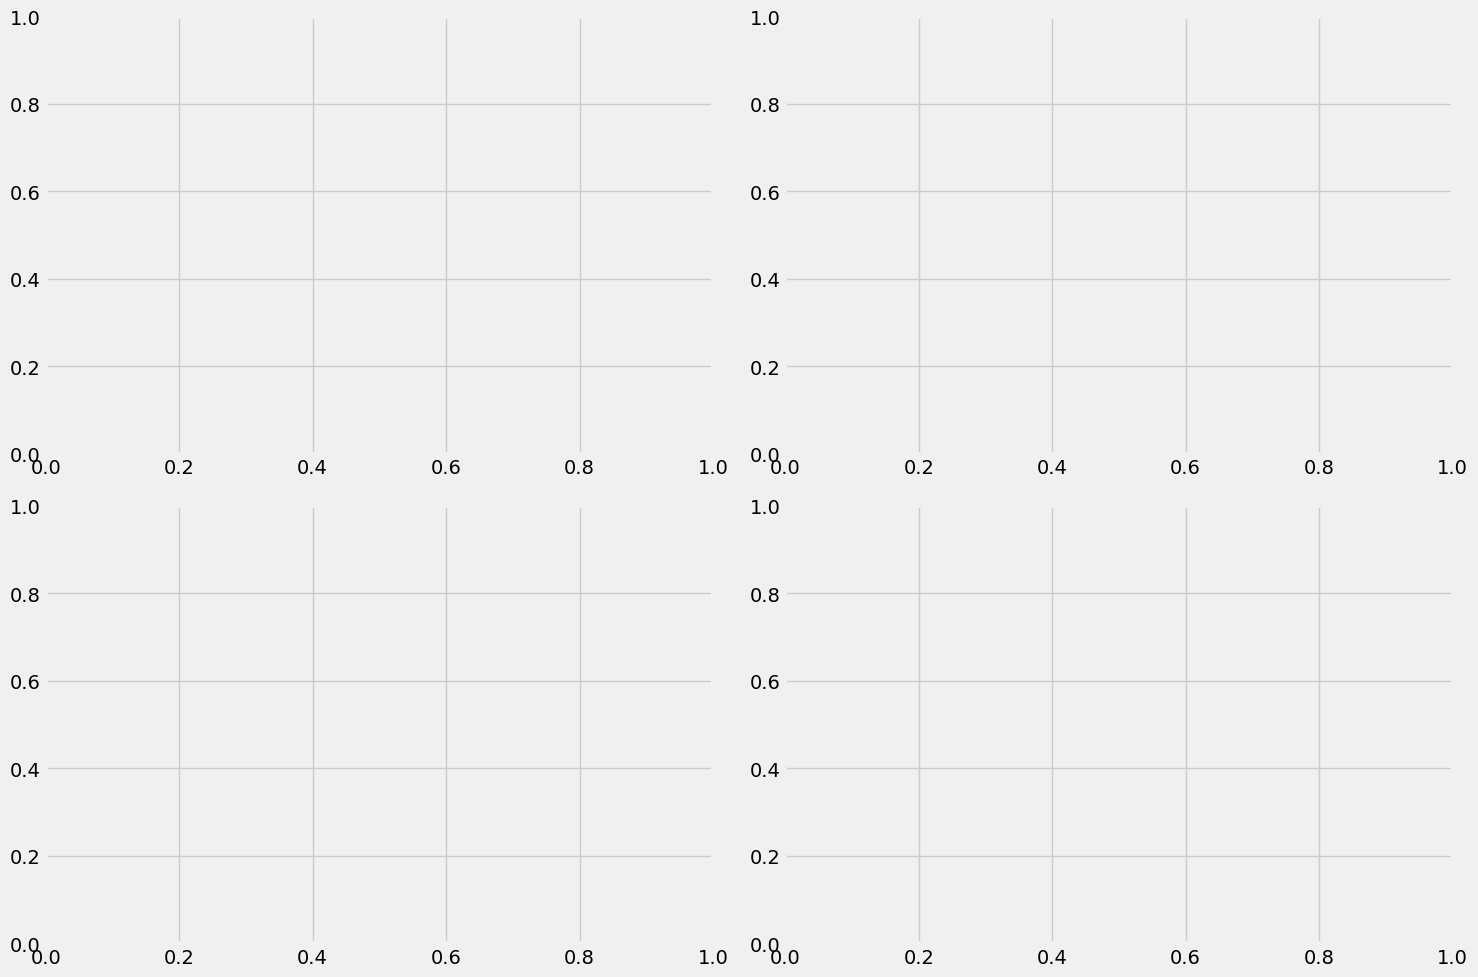

In [ ]:
#Training our dataset on different Classifiers to check the results and creating their classification reports
#NAves Bayes Clssifier
Classifier_gnb = GaussianNB().fit(x_train, np.argmax(y_train,axis=1))
pred_gnb = Classifier_gnb.predict(x_test)
print ('\n*\t\tClassification Report GNB:\n', classification_report(np.argmax(y_test,axis=1), pred_gnb))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_gnb)
### Support Vector Machine

Classifier_svm = svm.SVC(kernel='linear').fit(x_train, np.argmax(y_train,axis=1))
pred_svm = Classifier_svm.predict(x_test)
print ('\n*\t\tClassification Report SVM:\n', classification_report(np.argmax(y_test,axis=1), pred_svm))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_svm)
### Logistic Regression

Classifier_LR = linear_model.LogisticRegression(solver = 'liblinear', C = 75).fit(x_train, np.argmax(y_train,axis=1))
pred_LR = Classifier_LR.predict(x_test)
print ('\n*\t\tClassification Report LR:\n', classification_report(np.argmax(y_test,axis=1), pred_LR))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_LR)
### Decision Tree Regressor

Classifier_dt = tree.DecisionTreeClassifier().fit(x_train, np.argmax(y_train,axis=1))
pred_dt = Classifier_dt.predict(x_test)
print ('\n*\t\tClassification Report Deccsion Tree:\n', classification_report(np.argmax(y_test,axis=1), pred_dt))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_dt)
### Random Forest

Classifier_forest = RandomForestClassifier(n_estimators = 50, random_state = 0).fit(x_train,np.argmax(y_train,axis=1))
pred_fr = Classifier_dt.predict(x_test)


print ('\n*\t\tClassification Report Random Forest:\n', classification_report(np.argmax(y_test,axis=1), pred_fr))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_fr)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
classifiers = [GaussianNB(),svm.SVC(kernel='linear'),
               linear_model.LogisticRegression(solver = 'liblinear', C = 75),
               RandomForestClassifier(n_estimators = 50, random_state = 0)]
from sklearn.metrics import ConfusionMatrixDisplay
for cls in classifiers:
    cls.fit(x_train,np.argmax(y_train,axis=1))

colors = [ 'YlOrBr', 'GnBu', 'Pastel2', 'PuRd']
plt.tight_layout()
plt.show()


In [ ]:
#Classification Report of Lstm model
print('\n*\t\tClassification Report OF Brain Waves LSTM:\n', classification_report(np.argmax(y_test,axis=1), np.argmax(lstmmodel.predict(x_test),axis=1) ))

14/14 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step

*		Classification Report OF Brain Waves LSTM:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       153
           1       0.91      0.95      0.93       142
           2       0.96      0.95      0.95       132

    accuracy                           0.95       427
   macro avg       0.95      0.95      0.95       427
weighted avg       0.95      0.95      0.95       427



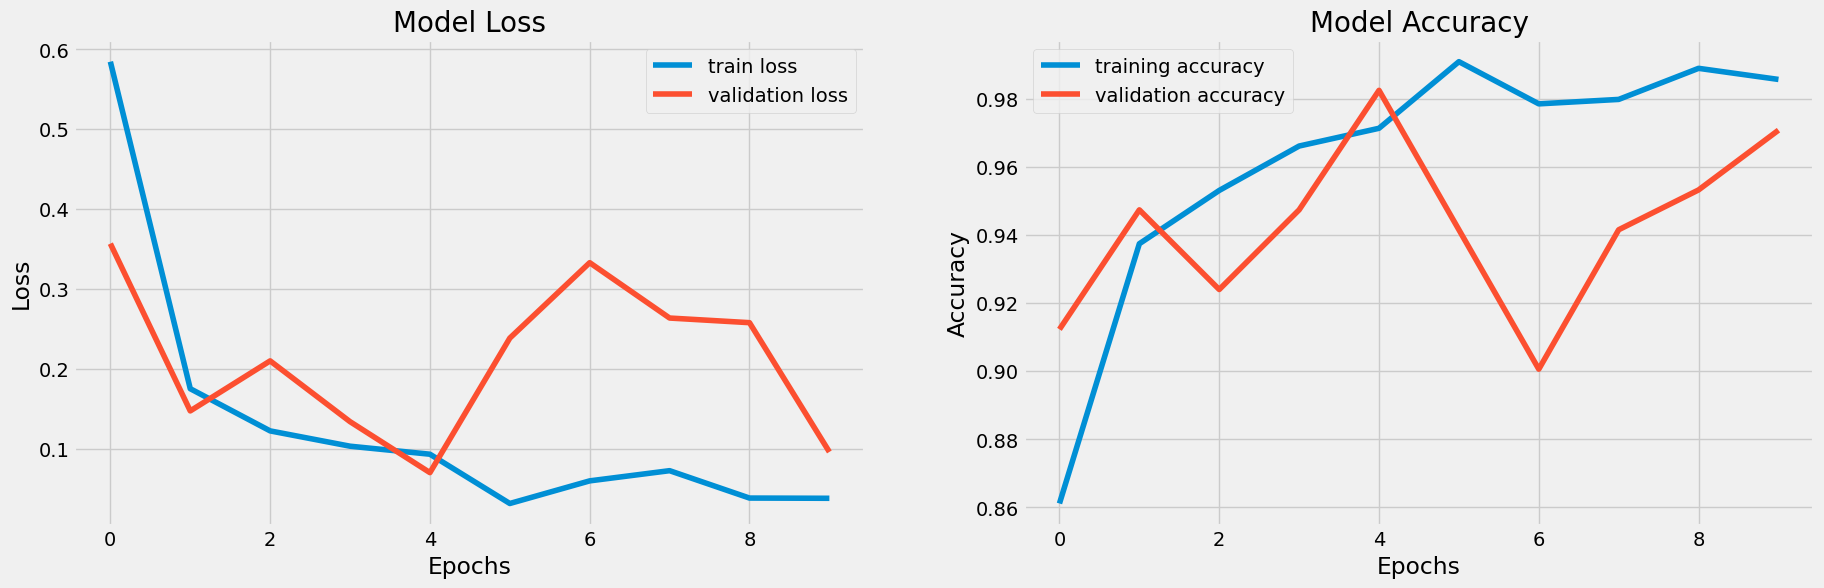

In [ ]:
#Plotting Graph of Lstm model Training, Loss and Accuracy
plt.style.use("fivethirtyeight")
plt.figure(figsize = (20,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss",fontsize=20)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train loss', 'validation loss'], loc ='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy",fontsize=20)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['training accuracy', 'validation accuracy'], loc ='best')
plt.show()